In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from datetime import datetime
from math import sqrt

In [2]:
bikes_hour_df_raws = pd.read_csv('hour.csv')
bikes_hour_df_raws.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# removing useless features  'casual' and 'registered' as they will not help us model demand from a single user behaviour
# bikes_hour_df = bikes_hour_df_raws.drop(['casual' , 'registered'], axis=1)
bikes_hour_df = bikes_hour_df_raws

As observed there is a relation between temp and count of bikes


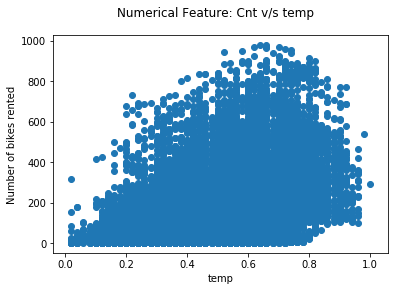

In [4]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Number of bikes rented')
print("As observed there is a relation between temp and count of bikes")

As observed there is a relation between temp and count of bikes


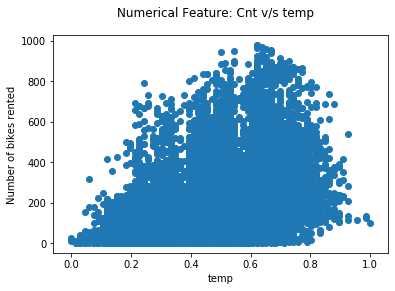

In [5]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Number of bikes rented')
print("As observed there is a relation between temp and count of bikes")

In [6]:
# removing useless feature 'atemp' as both 'temp' and 'atemp' have the same relation with cnt and can may present redundancy 
bikes_hour_df = bikes_hour_df_raws.drop(['atemp'], axis=1)

In [7]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=0)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_trian, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.00


In [8]:
# lets copy for editing without effecting original
bikes_df_model_data = bikes_hour_df.copy()

outcome = 'cnt'

#making feature list for each modeling - experiment by adding feature to the exclusion list
feature = [feat for feat in list(bikes_df_model_data) if feat not in [outcome, 'instant', 'dteday']]

X_train, X_test, y_train, y_test = train_test_split(bikes_df_model_data[feature],
                                                   bikes_df_model_data[outcome],
                                                   test_size=0.3, random_state=0)

lr_model = LinearRegression()

#training model in training set
lr_model.fit(X_train, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.00


In [9]:
def linear_regressor_param_selection(X, y, X_test, y_test, nfolds):
    param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('LinearRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('LinearRegressor With Parameters:'+str(grid_search.best_params_))  
    print('Linear Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for LinearRegressor on test set: '+str (mean_squared_error(y_test, y_pred)))

In [10]:
def svr_param_selection(X, y, X_test, y_test, nfolds):
#     Kernels = ['linear', 'poly', 'rbf']
    Kernels = ['poly']
#     Cs = [0.001, 0.01, 0.1, 1]
    Cs = [1]
#     Gammas = [0.001, 0.01, 0.1]
    Gammas = [ 0.1]
    param_grid = {'kernel':Kernels, 'C': Cs, 'gamma' : Gammas}
    grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('SVR MSE Score for training data: '+str(grid_search.best_score_))
    print('SVR With Parameters: '+str(grid_search.best_params_))    
    print('SVR coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for SVR on test set: '+str(mean_squared_error(y_test, y_pred)))

In [11]:
def random_forest_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Estimators = np.arange(1,100,15)
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'n_estimators': Estimators, 'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('RandomForestRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('RandomForestRegressor With Parameters: '+str(grid_search.best_params_))    
    print('Random Forest coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Random Forest Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [12]:
def decision_tree_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('DecisionTreeRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('DecisionTreeRegressor With Parameters: '+str(grid_search.best_params_)) 
    print('Decision Tree coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Decision Tree Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [13]:
def ada_boost_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Estimators = np.arange(1,100,15)
    Learning_rates = [0.01,0.05,0.1,0.3]
    Losses = ['linear', 'square', 'exponential']
    param_grid = {'n_estimators': Estimators, 'learning_rate': Learning_rates, 'loss': Losses}
    grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('AdaBoostRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('AdaBoostRegressor With Parameters:'+str(grid_search.best_params_))
    print('AdaBoost Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for AdaBoost Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [14]:
def gaussian_regressor_param_selection(X, y, X_test, y_test, nfolds):
    kernel_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
    kernel_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
    kernel_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
    Kernels = [kernel_rbf, kernel_rq, kernel_expsine]
    param_grid = {'kernel': Kernels}
    grid_search = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('GaussianRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('GaussianRegressor With Parameters:'+str(grid_search.best_params_)) 
    print('Gaussian Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for Gaussian Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [15]:
def neural_network_regressor_param_selection(X, y, X_test, y_test, nfolds):
    Hidden_Layer_Sizes = [1, 5, (5,5), (10,5)]
    Activations = ['logistic', 'relu']
    param_grid = {'hidden_layer_sizes': Hidden_Layer_Sizes, 'activation': Activations}
    grid_search = GridSearchCV(MLPRegressor(max_iter=900,random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('NeuralNetworkRegressor MSE Score for training data: '+str(grid_search.best_score_))
    print('NeuralNetworkRegressor With Parameters:'+str(grid_search.best_params_))
    print('Neural Network Regressor coefficient of determination R^2 on test data: '+str(grid_search.best_estimator_.score(X_test, y_test)))
    y_pred = grid_search.best_estimator_.predict(X_test)
    print('MSE for NeuralNetwork Regressor on test set: '+str(mean_squared_error(y_test, y_pred)))

In [151]:

#Using the 3-Fold HyperParam Search to evaluate the best hyperparams for each model
print("now ="+str(datetime.now()))
# svr_best_param           = svr_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
random_forest_best_param = random_forest_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
decision_tree_best_param = decision_tree_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
ada_boost_best_param     = ada_boost_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
linear_best_param         = linear_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
neural_network_best_param = neural_network_regressor_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))
#gaussian_best_param       = gaussian_regressor_param_selection(x_train_scaled, y_train, 3)
#print("now ="+str(datetime.now()))

now =2019-12-01 12:36:27.960458
now =2019-12-01 12:36:27.962430
RandomForestRegressor MSE Score for training data: 0.9887846583705294
RandomForestRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.01, 'n_estimators': 46}
Random Forest coefficient of determination R^2 on test data: 0.9896469275372656
MSE for Random Forest Regressor on test set: 342.06193186644896
now =2019-12-01 12:36:52.435950
DecisionTreeRegressor MSE Score for training data: 0.9886167094185685
DecisionTreeRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.01}
Decision Tree coefficient of determination R^2 on test data: 0.9889100112900997
MSE for Decision Tree Regressor on test set: 366.4093896898774
now =2019-12-01 12:36:52.688982
AdaBoostRegressor MSE Score for training data: 0.9995518496584129
AdaBoostRegressor With Parameters:{'learning_rate': 0.3, 'loss': 'square', 'n_estimators': 91}
AdaBoost Regressor coefficient of determination R^2 on test data: 0.9995472713574848

In [17]:
print("now ="+str(datetime.now()))
svr_best_param           = svr_param_selection(X_train, y_train, X_test, y_test, 3)
print("now ="+str(datetime.now()))


now =2019-12-02 05:37:11.294922


KeyboardInterrupt: 